## Non-thermal power and bpow parameters
In this work was fitting the non-thermal emission with a broken powerlaw in photon-space, i.e
\begin{equation}
I(\epsilon)\propto\begin{cases}
    \epsilon^{-\gamma_1}, & \text{if $\epsilon<\epsilon_\mathrm{B}$}\\
    \epsilon^{-\gamma_2}, & \text{if $\epsilon\geq\epsilon_\mathrm{B}$}
  \end{cases} \quad\mathrm{[photon\;s^{-1}\;keV^{-1}\;cm^{-2}]}
\end{equation}

where $\epsilon_\mathrm{B}$ is the break in the powerlaw, and $\gamma_1=1.5$ to represent the flattening at lower energies, and $\gamma_2$ the powerlaw index of interest, which for a thick-target model should be related to the electron distribution powerlaw index $\delta=\gamma_2+1$. Here the issue is that we do not know the low energy cutoff of the electron distribution $E_\mathrm{C}$ and first attempt is just using $E_\mathrm{C}=\epsilon_\mathrm{B}$.

For the non-thermal power calculation need the photon flux [photons $\mathrm{s}^{-1}$ $\mathrm{keV}^{-1}$ $\mathrm{cm}^{-2}$] of the powerlaw with index above the break at 1 keV, which we will call $A$, then
\begin{equation}
P(\geq E_\mathrm{C})=9.5\times10^{24}\gamma_2^2 (\gamma_2-1)\beta\left(\gamma_2-\frac{1}{2},\frac{3}{2}\right)AE_\mathrm{C}^{(1-\gamma_2)}\quad\mathrm{[erg\;s^{-1}]}
\end{equation}

where $\beta(p,q)$ is the Beta function. Note that the $9.5\times10^{24}$ was used in [Hannah et al. 2008](https://doi.org/10.1086/529012) and [Lin et al. 2001](https://doi.org/10.1086/323270) - actually [Lin 1974](https://doi.org/10.1007/BF00240886) has a factor of $3\times10^{24}$ quoting numerical errors from [Brown 1971](https://doi.org/10.1007/BF00149070). However Aschwanden 2004 (book, §13.2.2 derivation and Eqn 13.2.31, based off Brown 1971 number) and subsequently papers like [Aschwanden et al. 2019](https://doi.org/10.3847/1538-4357/ab2cd4) use $4.3\times10^{24}$ Which is correct - something to do with assumption about mean molecular mass or abundance, or cross section approximations? Of course now would just fit with the thick-target model of a powerlaw electron distribution $F(\geq E_\mathrm{C})\propto E^{-\delta}$ via the Holman code. So can numerically check all this - simulate a thick-target spectrum, fit with bpow and calculate the power and compare to what it show be.... see below

OSPEX fitted a broken powerlaw with bpow and the normalisation parameter is the photon flux of the powerlaw from below the break at the epivot of 50 keV, i.e. $I_1(50)$. So need to convert that to the photon flux at the break - as there the two powerlaws match, i.e. $I_1(\epsilon_\mathrm{B})=I_2(\epsilon_\mathrm{B})$ - and then use that value to work out the photon flux of the powerlaw index above the break at 1 keV, i.e. $I_2(1)\equiv A$. 

For the powerlaw below the break we assume some scaling constant $K_1$, so $I_1(\epsilon)=K_1\epsilon^{-1.5}$ then for the normalisation value from bpow $I_1(50)$ we get
\begin{equation}
I_1(50)=K_1 50^{-1.5}\quad \Rightarrow\quad K_1=I_1(50)/50^{-1.5}
\end{equation}
Then at the break energy the two power laws match, i.e.
\begin{equation}
I_1(\epsilon_\mathrm{B})=I_2(\epsilon_\mathrm{B})\quad \Rightarrow\quad I_1(50)\left(\frac{\epsilon_\mathrm{B}}{50}\right)^{-1.5}=K_2 \epsilon_\mathrm{B}^{-\gamma_2}\quad \Rightarrow\quad K_2=I_1(50)\left(\frac{\epsilon_\mathrm{B}}{50}\right)^{-1.5}\epsilon_\mathrm{B}^{\gamma_2}
\end{equation} 
Hence $I_2(1)\equiv A$ is going to be
\begin{equation}
I_2(1)=K_2 1^{-\gamma_2}=I_1(50)\left(\frac{\epsilon_\mathrm{B}}{50}\right)^{-1.5}\epsilon_\mathrm{B}^{\gamma_2} 1^{-\gamma_2}=I_1(50)\left(\frac{\epsilon_\mathrm{B}}{50}\right)^{-1.5}\epsilon_\mathrm{B}^{\gamma_2} \equiv A
\end{equation}

---
More straightforward to get the non-thermal power when you have the electron distribution parameters directly, say via fitting a thick-target model with parameters of the total electron flux $N$ [in electrons $\mathrm{s}^{-1}$], of a powerlaw with index $\delta$ above a low energy cutoff of $E_\mathrm{C}$ [in keV]. Which is an electron distribution of $F(E\geq E_\mathrm{C})\propto E^{-\delta}=K_n E^{-\delta}$, where $K_n$ is just a constant. Then
\begin{equation}
N=\int_{E_\mathrm{C}}^\infty F(E) dE=K_n\int_{E_\mathrm{C}}^\infty E^{-\delta}  dE\quad\Rightarrow\quad K_n=N(\delta-1)E_\mathrm{C}^{(1-\delta)}
\end{equation}

Hence the power can be found to be
\begin{equation}
P\int_{E_\mathrm{C}}^\infty E F(E) dE=N(\delta-1)E_\mathrm{C}^{(1-\delta)}\int_{E_\mathrm{C}}^\infty E^{(1-\delta)} dE
\end{equation}
which gives us
\begin{equation}
P(E\geq E_\mathrm{C})=N \frac{(\delta-1)}{(\delta-2)}E_\mathrm{C}\;[\mathrm{keV\;s}^{-1}]=1.6\times10^{-9}\times N \frac{(\delta-1)}{(\delta-2)}E_\mathrm{C}\;[\mathrm{erg\;s}^{-1}]
\end{equation}


In [50]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
from sunpy.io.special import read_genx
from astropy.time import Time
from sunpy.io.special import read_genx
from scipy.special import beta

import warnings
warnings.simplefilter('ignore')

matplotlib.rcParams['font.size']=14

To try and confirm which scaling number is correct for the photon powerlaw approx to the thick-target have simulated the thick-target emission from a powerlaw of electrons ($N,E_\mathrm{C},\delta$) then loaded into OSPEX, fitted with a broken powerlaw and obtained the parameters ($I_1(50),\epsilon_\mathrm{B},\gamma$). Then can calculate the power two ways and comapre which scaling parameter is more likely to be correct ($9.5$ or $4.3$ $\times10^{24}$)

sswidl code to do this is check_nnpow_calc_loop.pro which saved output is nnpow_check.genx, and here is an example plot of one of the fits, showing on the left the thick target model (black data) in photon space (left) and in RHESSI count space (right), which is then fitted with the bpow model (orange line) in count space.

![example spectrum fit](fit_tt_bpow.png)



In [4]:
res=read_genx('nnpow_check.genx')

In [31]:
# Load in the sswild results
res["SAVEGEN0"][600]["N35"]

# And reshape to the correct grid
N35=np.array([r["N35"] for r in res["SAVEGEN0"]])
N35=N35.reshape((25,25))
dl=np.array([r["DEL"] for r in res["SAVEGEN0"]])
dl=dl.reshape((25,25))
ec=np.array([r["EC"] for r in res["SAVEGEN0"]])
ec=ec.reshape((25,25))
pow=np.array([r["POW"] for r in res["SAVEGEN0"]])
pow=pow.reshape((25,25))
# The A parameter calculated from the epivot norm value
f1=np.array([r["F1"] for r in res["SAVEGEN0"]])
f1=f1.reshape((25,25))
gam=np.array([r["GAM"] for r in res["SAVEGEN0"]])
gam=gam.reshape((25,25))
eb=np.array([r["EB"] for r in res["SAVEGEN0"]])
eb=eb.reshape((25,25))
# bpow power using Ec from thick-target model (not fitted ec) no factor
ipowec=np.array([r["IPOW_EC_NC"] for r in res["SAVEGEN0"]])
ipowec=ipowec.reshape((25,25))
# bpow power using Ec and del=gam-1 from thick-target model (not fitted ec, or gam) no factor
ipowdec=np.array([r["IPOW_DEC_NC"] for r in res["SAVEGEN0"]])
ipowdec=ipowdec.reshape((25,25))

# # And reshape to the correct grid
# N35=np.array([r["N35"] for r in res["SAVEGEN0"]])
# dl=np.array([r["DEL"] for r in res["SAVEGEN0"]])
# ec=np.array([r["EC"] for r in res["SAVEGEN0"]])
# pow=np.array([r["POW"] for r in res["SAVEGEN0"]])
# # The A parameter calculated from the epivot norm value
# f1=np.array([r["F1"] for r in res["SAVEGEN0"]])
# gam=np.array([r["GAM"] for r in res["SAVEGEN0"]])
# eb=np.array([r["EB"] for r in res["SAVEGEN0"]])
# # bpow power using Ec from thick-target model (not fitted ec)
# ipowec=np.array([r["IPOW_EC_NC"] for r in res["SAVEGEN0"]])
# # bpow power using Ec and del=gam-1 from thick-target model (not fitted ec, or gam)
# ipowdec=np.array([r["IPOW_DEC_NC"] for r in res["SAVEGEN0"]])


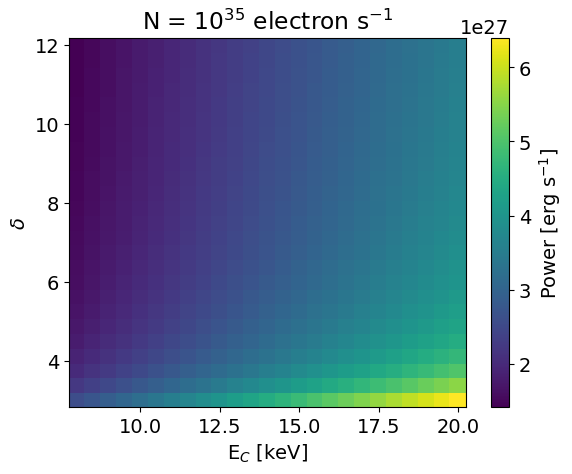

In [42]:
plt.pcolor(ec,dl,pow)
plt.xlabel('E$_C$ [keV]')
plt.ylabel('$\delta$')
plt.title('N = $10^{35}$ electron s$^{-1}$')
plt.colorbar(label='Power [erg s$^{-1}$]')
plt.show()

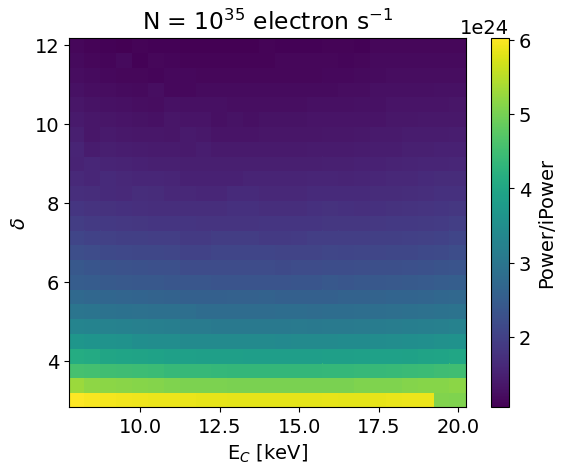

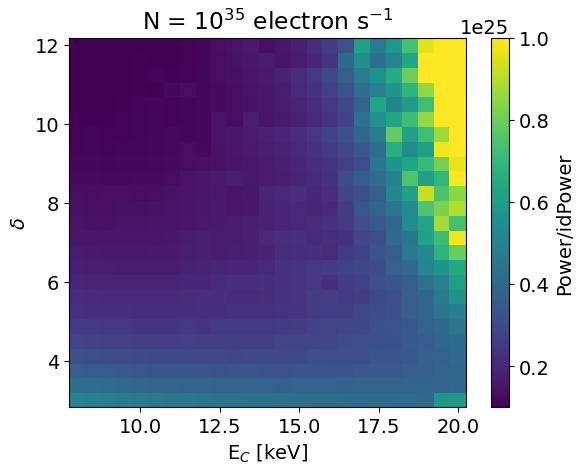

In [58]:
plt.pcolor(ec,dl,pow/ipowec)
plt.xlabel('E$_C$ [keV]')
plt.ylabel('$\delta$')
plt.title('N = $10^{35}$ electron s$^{-1}$')
plt.colorbar(label='Power/iPower')
plt.show()

# So these are all < 6e24, so that rules the 9.5e24 factor out?
# Though iPower here uses the tt model E_c but the fitted gamma

plt.pcolor(ec,dl,pow/ipowdec,norm=colors.Normalize(vmin=1e24,vmax=1e25))
plt.xlabel('E$_C$ [keV]')
plt.ylabel('$\delta$')
plt.title('N = $10^{35}$ electron s$^{-1}$')
plt.colorbar(label='Power/idPower')
plt.show()

# So these are mostly < 6e24, so that rules the 9.5e24 factor out?
# idPower here uses the tt model E_c and delta-1 as gamma

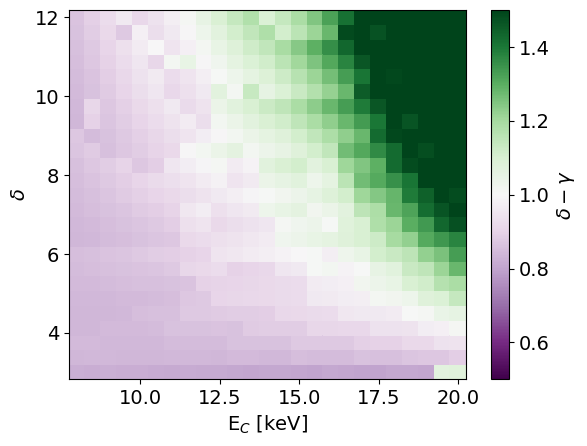

In [55]:
# Check the powerlaw relationship, should be \delta=\gamma+1, so \delta-\gamma=1
plt.pcolor(ec,dl,dl-gam,norm=colors.Normalize(vmin=0.5,vmax=1.5),cmap='PRGn')
plt.xlabel('E$_C$ [keV]')
plt.ylabel('$\delta$')
plt.colorbar(label='$\delta-\gamma$')
plt.show()
